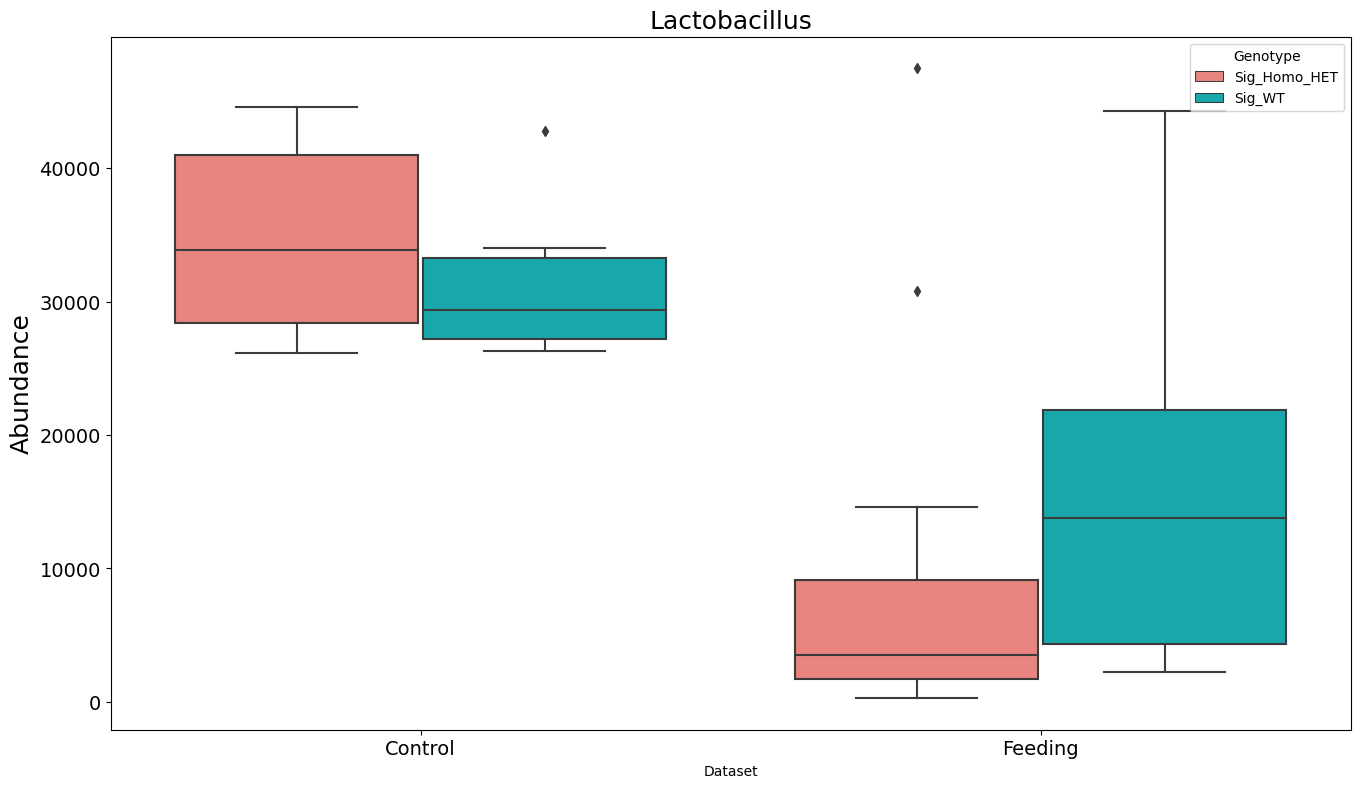

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for feeding
data_F = {
    'sample': [4, 5, 6, 9, 10, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 44, 45],
    'Genotype': ['Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET',
                 'Sig_WT', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET',
                 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT',
                 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_WT', 'Sig_Homo_HET'],
    'Lactobacillus': [1701, 4368, 1561, 9104, 3187, 2696, 1203, 9074, 3124, 20031, 10214, 6000, 2278, 9098, 14591, 279, 13760, 3485, 518, 30808, 34103, 2594, 47483, 44261, 21853, 4690],
}

# Sample data for control
data_C = {
    'sample': [1, 2, 3, 7, 8, 11, 13, 14, 15, 22, 23, 24, 25, 30, 40, 41, 42, 43, 46, 47, 48, 49],
    'Genotype': ['Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET',
                 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET',
                 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_Homo_HET', 'Sig_WT', 'Sig_Homo_HET', 'Sig_Homo_HET',
                 'Sig_Homo_HET'],
    'Lactobacillus': [44381, 42758, 43620, 44576, 43701, 30982, 26114, 27176, 28842, 27690, 32981, 33292, 34044, 34339, 26302, 35700, 33459, 26380, 27021, 26176, 40092, 37526],
}

# Combine feeding and control data into a single DataFrame
df_F = pd.DataFrame(data_F)
df_C = pd.DataFrame(data_C)
df_F['Dataset'] = 'Feeding'
df_C['Dataset'] = 'Control'
df_combined = pd.concat([df_C, df_F])  # Note the order change

# Melt the combined DataFrame for easy plotting
df_melted_combined = pd.melt(df_combined, id_vars=['Dataset', 'Genotype', 'sample'], value_vars=['Lactobacillus'],
                             var_name='Bacterial Species', value_name='Abundance')

# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}

# Box plot for combined data with Control on the left and Feeding on the right
plt.figure(figsize=(16, 9))
sns.boxplot(x='Dataset', y='Abundance', hue='Genotype', data=df_melted_combined, palette=colors)
plt.title('Lactobacillus',fontsize=18)
plt.ylabel('Abundance',fontsize=18)  # Add y-axis label for clarity
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Show the plot
plt.show()

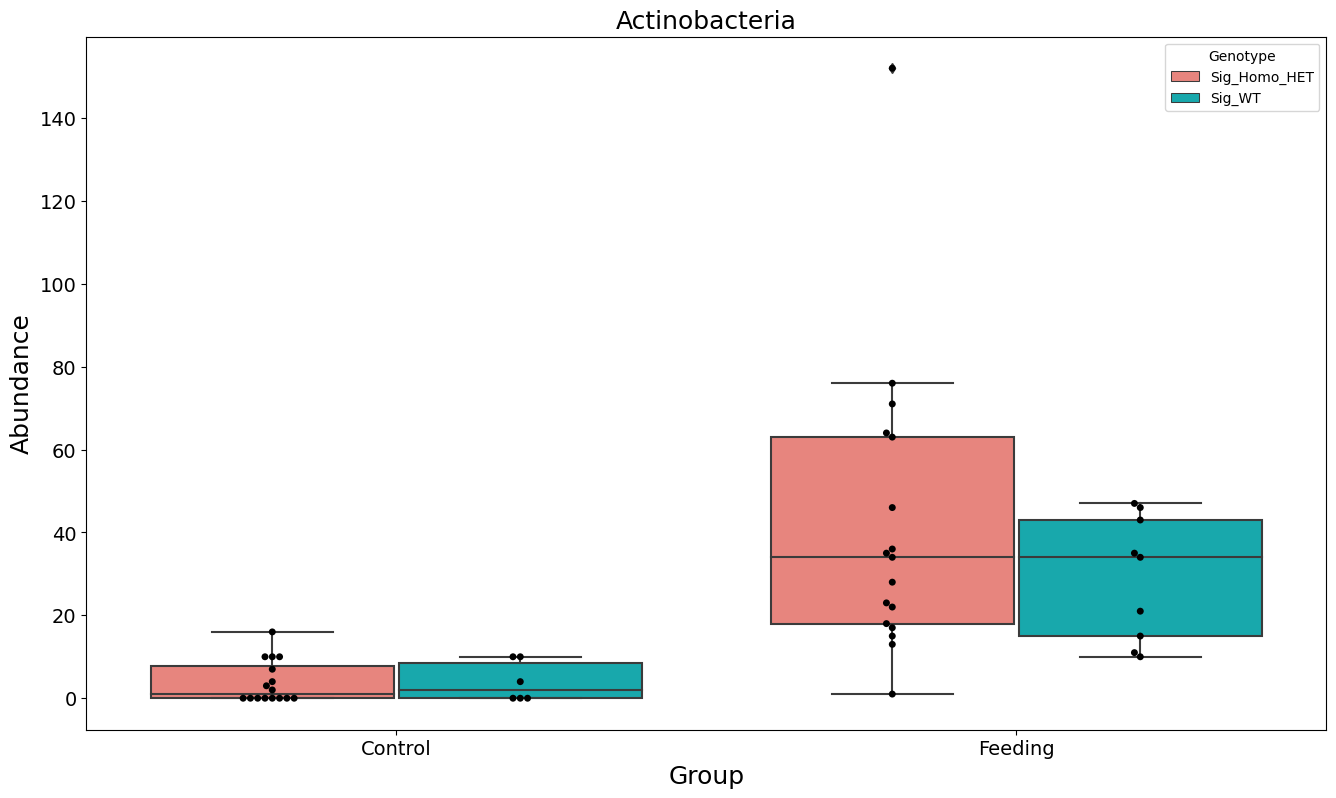

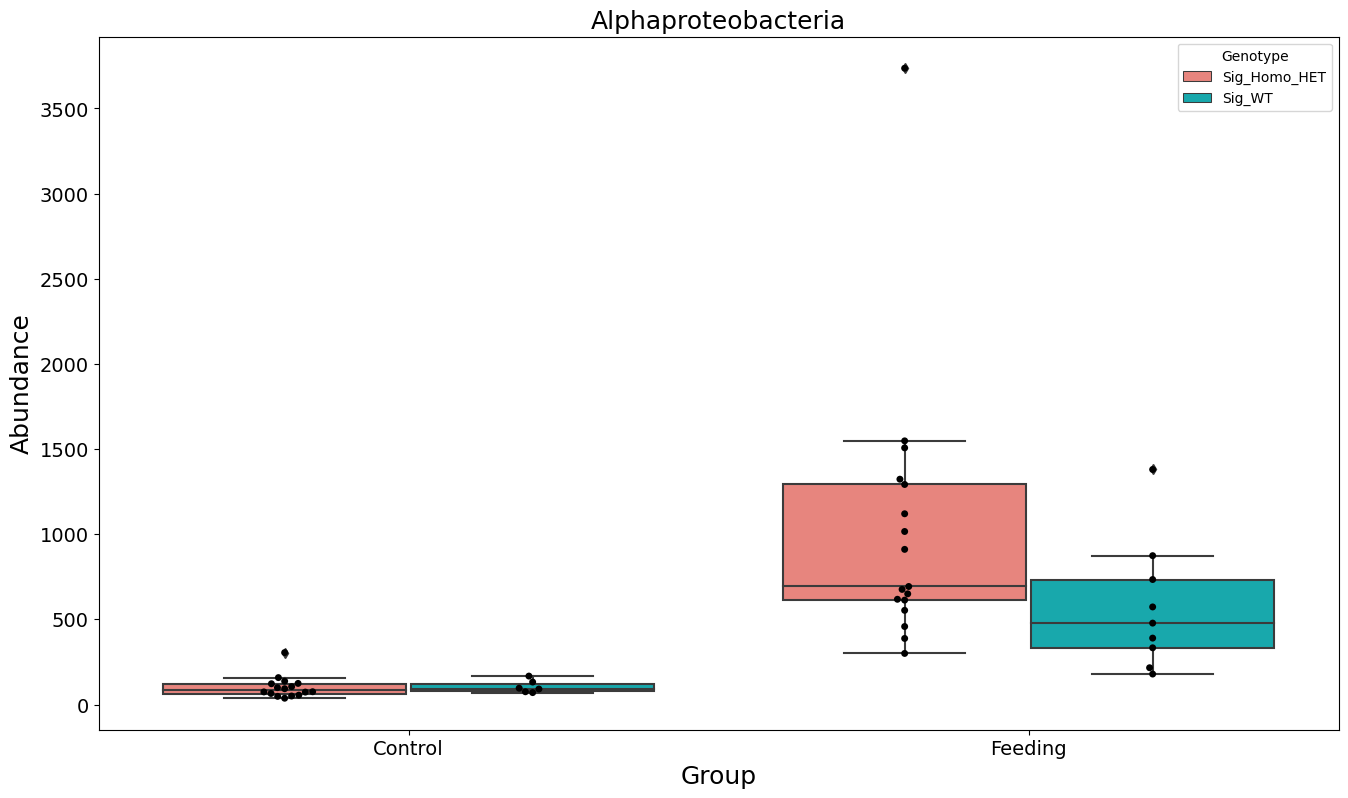

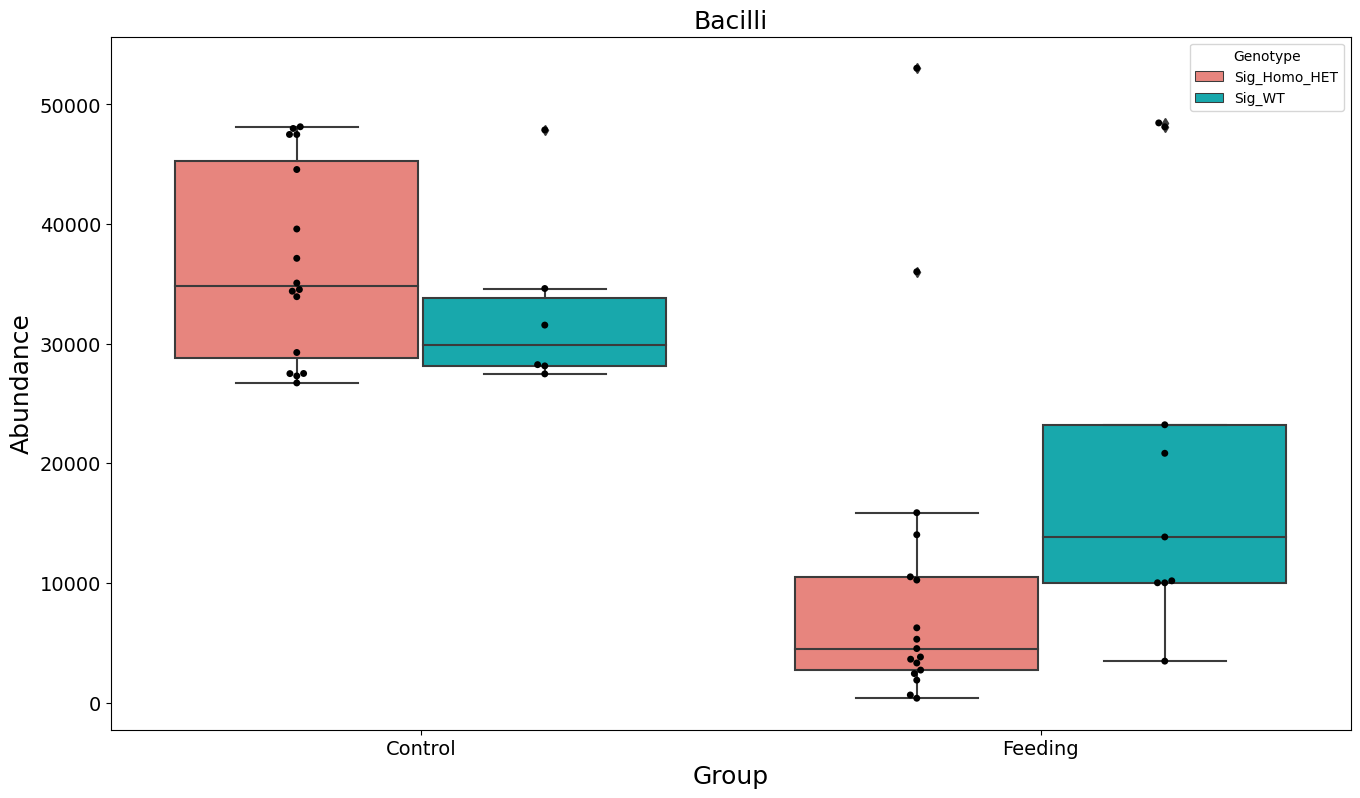

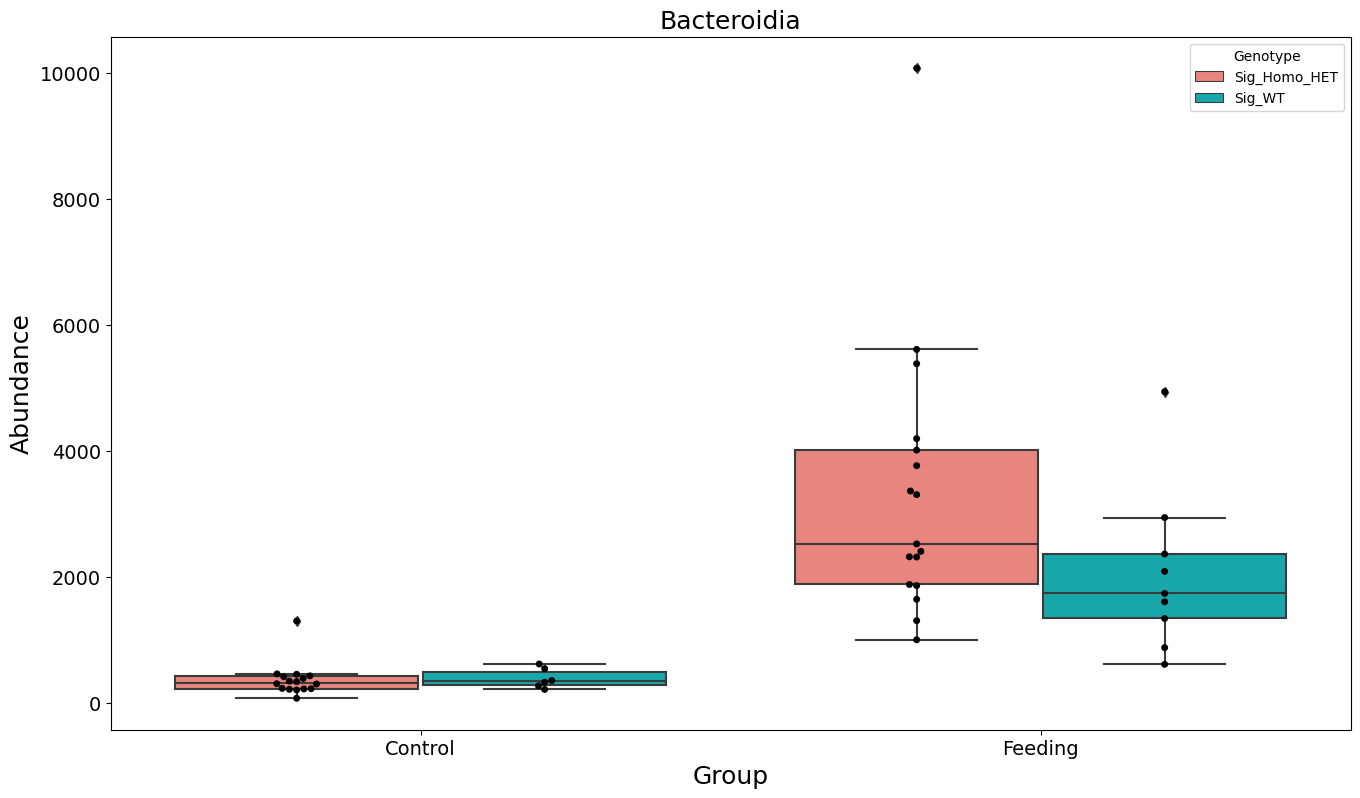

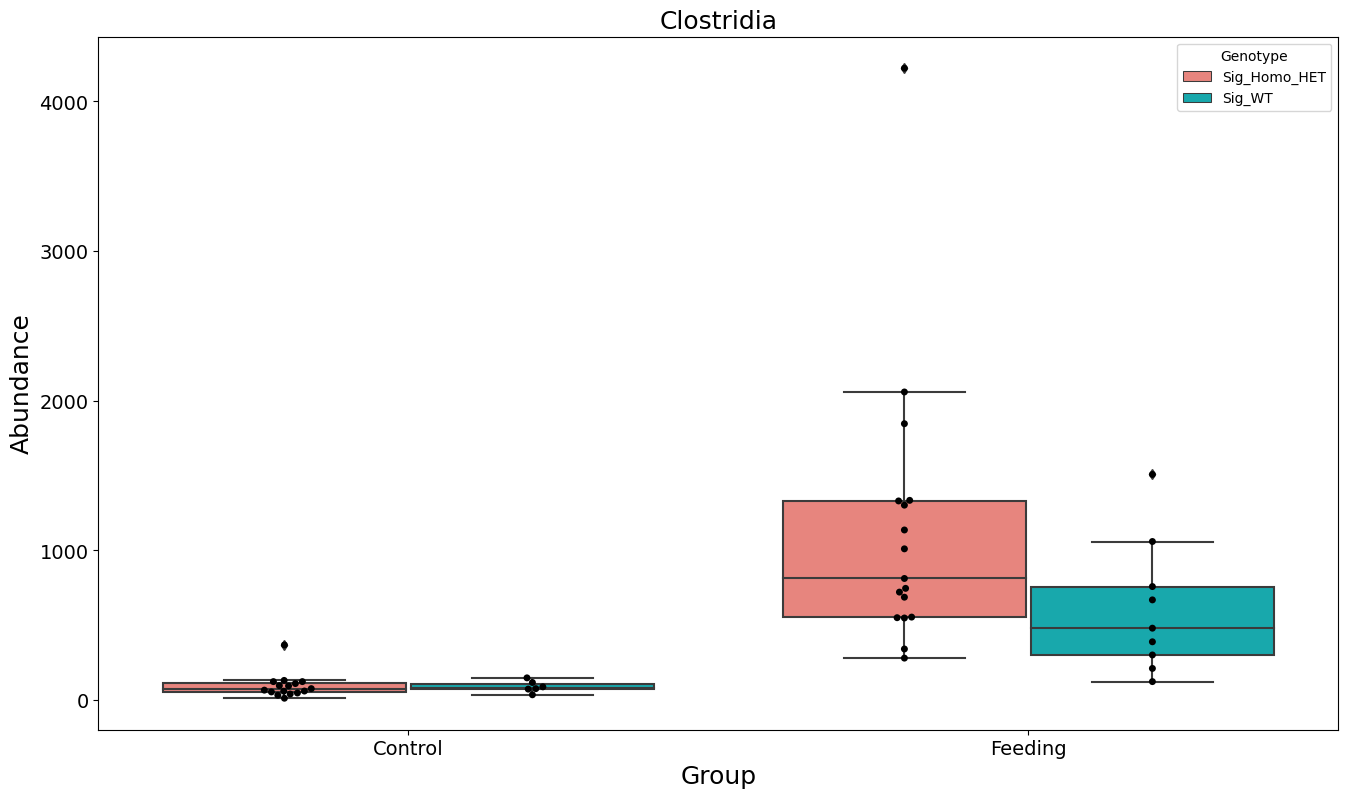

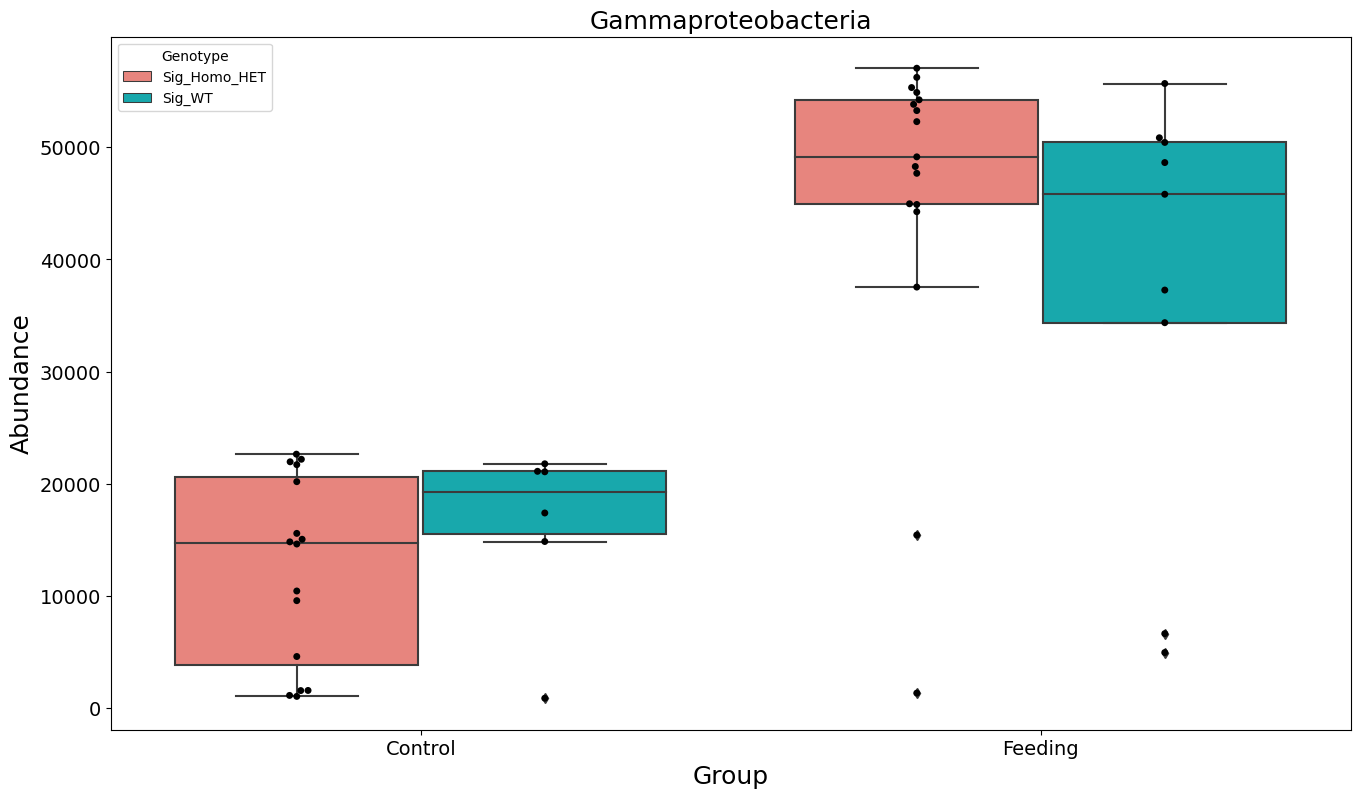

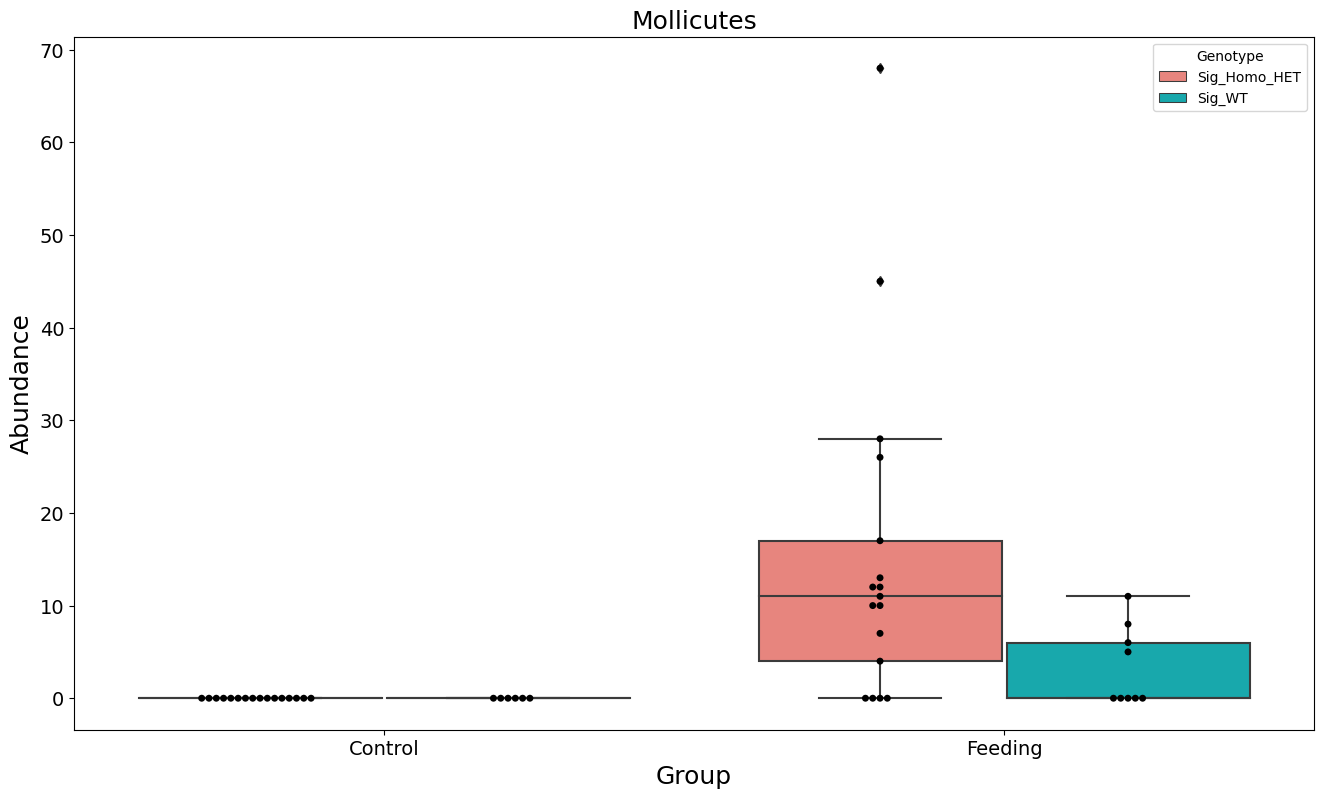

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read data from CSV files for feeding and control
df_F = pd.read_csv('taxa_abund_class_F.csv', index_col=0).T
df_F['Actinobacteria'] = pd.to_numeric(df_F['Actinobacteria'], errors='coerce')
df_F['Alphaproteobacteria'] = pd.to_numeric(df_F['Alphaproteobacteria'], errors='coerce')
df_F['Bacilli'] = pd.to_numeric(df_F['Bacilli'], errors='coerce')
df_F['Bacteroidia'] = pd.to_numeric(df_F['Bacteroidia'], errors='coerce')
df_F['Clostridia'] = pd.to_numeric(df_F['Clostridia'], errors='coerce')
# Gammaproteobacteria Mollicutes
df_F['Gammaproteobacteria'] = pd.to_numeric(df_F['Gammaproteobacteria'], errors='coerce')
df_F['Mollicutes'] = pd.to_numeric(df_F['Mollicutes'], errors='coerce')
df_F['Group'] = 'Feeding'

df_C = pd.read_csv('taxa_abund_class_C.csv', index_col=0).T
df_C['Actinobacteria'] = pd.to_numeric(df_C['Actinobacteria'], errors='coerce')
df_C['Alphaproteobacteria'] = pd.to_numeric(df_C['Alphaproteobacteria'], errors='coerce')
df_C['Bacilli'] = pd.to_numeric(df_C['Bacilli'], errors='coerce')
df_C['Bacteroidia'] = pd.to_numeric(df_C['Bacteroidia'], errors='coerce')
df_C['Clostridia'] = pd.to_numeric(df_C['Clostridia'], errors='coerce')
df_C['Gammaproteobacteria'] = pd.to_numeric(df_C['Gammaproteobacteria'], errors='coerce')
df_C['Mollicutes'] = pd.to_numeric(df_C['Mollicutes'], errors='coerce')
df_C['Group'] = 'Control'

# Concatenate the DataFrames
df_concat = pd.concat([df_F, df_C])
dot_colors = {'Sig_Homo_HET': 'black',  # Light Blue
          'Sig_WT': 'black'}
# Actinobacteria
plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Actinobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Actinobacteria',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)
# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Actinobacteria',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Alphaproteobacteria
plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Alphaproteobacteria',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)

# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Alphaproteobacteria',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Bacilli
plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Bacilli', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Bacilli',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)

# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Bacilli',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Bacteroidia
plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Bacteroidia', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Bacteroidia',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)
# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Bacteroidia',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Clostridia
plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Clostridia', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Clostridia',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)

# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Clostridia',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Gammaproteobacteria

plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Gammaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Gammaproteobacteria',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)

# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Gammaproteobacteria',fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
# Mollicutes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.figure(figsize=(16, 9))
ax = plt.axes()
# Set specific colors for Genotype
colors = {'Sig_Homo_HET': '#F8766D',  # Light Blue
          'Sig_WT': '#00BFC4'}
# Plot data from df_concat
sns.boxplot(x='Group', y='Mollicutes', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
sns.swarmplot(x='Group', y='Mollicutes',hue='Genotype', data=df_concat, palette=dot_colors, order=['Control', 'Feeding'], dodge=True,legend=False)

# sns.boxplot(x='Group', y='Alphaproteobacteria', hue='Genotype', data=df_concat, ax=ax, palette=colors, width=0.8, order=['Control', 'Feeding'])
# Set labels and title
plt.title('Mollicutes', fontsize=18)
plt.xlabel('Group',fontsize=18)
plt.ylabel('Abundance',fontsize=18)

# Show the legend
plt.legend(title='Genotype')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()